# X-LoVoCCS Luminosity-Temperature Relations

In this notebook we create luminosity-temperature scaling relations from our analyses of the X-LoVoCCS galaxy clusters. The 'global' X-ray analyses of LoVoCCS clusters were performed with two different modes of spectral fitting, one with the metallicity frozen at 0.3$Z_{\odot}$, and one with metallicity free to vary. 

We construct scaling relations from temperatures and luminosities measured within XGA-LTR derived $R_{500}$ apertures, as well as in 'core-excised' annular regions from [0.15-1]$R_{500}$. Luminosities are measured in 0.5-2.0keV and bolometric (0.01-100.0keV) bands, and are corrected for hydrogen column absorption. As such, 8 different variations on a LT relation are created in this notebook:
* $L^{52}_{\rm{X,500}}$-$T_{\rm{X,500}}$ - metallicity fixed
* $L^{52}_{\rm{X,500}}$-$T_{\rm{X,500}}$ - metallicity free
* $L^{52}_{\rm{X,500ce}}$-$T_{\rm{X,500ce}}$ - metallicity fixed
* $L^{52}_{\rm{X,500ce}}$-$T_{\rm{X,500ce}}$ - metallicity free
* $L^{bol}_{\rm{X,500}}$-$T_{\rm{X,500}}$ - metallicity fixed
* $L^{bol}_{\rm{X,500}}$-$T_{\rm{X,500}}$ - metallicity free
* $L^{bol}_{\rm{X,500ce}}$-$T_{\rm{X,500ce}}$ - metallicity fixed
* $L^{bol}_{\rm{X,500ce}}$-$T_{\rm{X,500ce}}$ - metallicity free

All scaling relations objects generated in this part of the analysis are saved and can be used to easily access these results. <font color='red'><b>They are currently saved as Pickles, which are only readable back into a Python object, and are very sensitive to changes in XGA version - we will create a better storage solution.</b></font> 

## Import Statements

In [36]:
from xga.relations.fit import scaling_relation_lira
from xga import DEFAULT_COSMO

from astropy.units import Quantity
import pandas as pd
import numpy as np

## Loading Results

In [2]:
res500 = pd.read_csv('../../outputs/results/ltr_r500_pipeline_results.csv')
res500.head(5)

,name,MCXC,LoVoCCSID,LoVoCCS_name,ra,dec,redshift,sub_samp,old_LoVoCCSID,r500,...,Lx500_0.01-100.0+,Tx500ce,Tx500ce-,Tx500ce+,Lx500ce_0.5-2.0,Lx500ce_0.5-2.0-,Lx500ce_0.5-2.0+,Lx500ce_0.01-100.0,Lx500ce_0.01-100.0-,Lx500ce_0.01-100.0+
0,LoVoCCS-0,J1558.3+2713,0,LoVoCCS-0,239.585833,27.226944,0.0894,north,0,1241.367006,...,7.742864e+43,6.79336,0.059572,0.059953,3.855936e+44,1.744255e+43,1.893153e+43,1.452341e+45,7.284100e+43,8.465869e+43
1,LoVoCCS-1,J1510.9+0543,1,LoVoCCS-1,227.729167,5.720000,0.0766,south,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LoVoCCS-2,J0258.9+1334,2,LoVoCCS-2,44.739583,13.579444,0.0739,south,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LoVoCCS-3,J1348.8+2635,3,LoVoCCS-3,207.220833,26.595556,0.0622,north,3,941.974183,...,3.115630e+42,4.53615,0.046741,0.047531,1.877253e+44,7.970320e+41,4.609245e+41,5.852525e+44,3.922180e+42,3.150757e+42
4,LoVoCCS-4,J0041.8-0918,4,LoVoCCS-4,10.458750,-9.301944,0.0555,south,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
res500_metfree = pd.read_csv('../../outputs/results/ltr_r500_metfree_pipeline_results.csv')
res500_metfree.head(5)

,name,MCXC,LoVoCCSID,LoVoCCS_name,ra,dec,redshift,sub_samp,old_LoVoCCSID,r500,...,Tx500ce+,Lx500ce_0.5-2.0,Lx500ce_0.5-2.0-,Lx500ce_0.5-2.0+,Lx500ce_0.01-100.0,Lx500ce_0.01-100.0-,Lx500ce_0.01-100.0+,Zmet500ce,Zmet500ce-,Zmet500ce+
0,LoVoCCS-0,J1558.3+2713,0,LoVoCCS-0,239.585833,27.226944,0.0894,north,0,1241.126247,...,0.062129,3.859586e+44,2.108788e+43,1.512657e+43,1.443280e+45,7.869493e+43,8.390768e+43,0.209867,0.013384,0.013336
1,LoVoCCS-1,J1510.9+0543,1,LoVoCCS-1,227.729167,5.720000,0.0766,south,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LoVoCCS-2,J0258.9+1334,2,LoVoCCS-2,44.739583,13.579444,0.0739,south,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LoVoCCS-3,J1348.8+2635,3,LoVoCCS-3,207.220833,26.595556,0.0622,north,3,935.622882,...,0.048816,1.894150e+44,6.939636e+41,4.869208e+41,5.772712e+44,3.715156e+42,4.449161e+42,0.128075,0.012191,0.012298
4,LoVoCCS-4,J0041.8-0918,4,LoVoCCS-4,10.458750,-9.301944,0.0555,south,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Setting up for scaling relation fits

In [4]:
tx_norm = Quantity(4, 'keV')

lx52_norm = Quantity(1e+44, 'erg/s')
lxbol_norm = Quantity(5e+44, 'erg/s')

In [5]:
names = res500['LoVoCCS_name'].values
zs = res500['redshift'].values

In [6]:
DEFAULT_COSMO

LambdaCDM(H0=70 km / (Mpc s), Om0=0.3, Ode0=0.7, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=None)

In [7]:
inv_e = DEFAULT_COSMO.inv_efunc(zs)
inv_e

array([0.95876463, 0.96477483, 0.96603877, 0.97149936, 0.97461373,
       0.97456732, 0.94690026, 0.95471062, 0.9559847 , 0.97303449,
       0.96106887, 0.9752169 , 0.98219513, 0.96543038, 0.96683387,
       0.96073995, 0.9734063 , 0.94761193, 0.96106887, 0.95518264,
       0.97808842, 0.95876463, 0.96275908, 0.95659773, 0.95471062,
       0.97298801, 0.96477483, 0.94988715, 0.97535604, 0.96102189,
       0.96678712, 0.95031338, 0.95541859, 0.94538098, 0.95579602,
       0.95277369, 0.96655331, 0.96073995, 0.96505583, 0.96158557,
       0.94504846, 0.94580842, 0.95819969, 0.98642039, 0.97841208,
       0.94452579, 0.9642595 , 0.95607903, 0.98518253, 0.9638377 ,
       0.97419594, 0.94680534, 0.95862342, 0.96308745, 0.95843511,
       0.95036073, 0.94519098, 0.96205511, 0.97910527, 0.95645628,
       0.97831962, 0.95508825, 0.95876463, 0.94599836, 0.95471062,
       0.94623575, 0.95069216, 0.94856034, 0.95984673, 0.94618827,
       0.96674036, 0.9798441 , 0.96069295, 0.95107083, 0.97396

## Fitting with LIRA

### $L^{52}_{\rm{X,500}}$-$T_{\rm{X,500}}$

#### Fixed Abundance

In [37]:
lx = Quantity(res500[['Lx500_0.5-2.0', 'Lx500_0.5-2.0-', 'Lx500_0.5-2.0+']].values, 'erg/s')*inv_e[..., None]

# TODO WE'LL NEED TO DECIDE HOW TO DO THIS PROPERLY
lx[np.where((lx[:, 1] > lx[:, 0]) | (lx[:, 2] > lx[:, 0]))[0], :] = np.NaN

tx = Quantity(res500[['Tx500', 'Tx500-', 'Tx500+']].values, 'keV')

lx52_tx_r500_metfix = scaling_relation_lira(lx[:, 0], lx[:, 1:], tx[:, 0], tx[:, 1:], lx52_norm, tx_norm, 
                                            y_name=r'$E(z)^{-1}L^{52}_{\rm{X,500}}$', x_name=r'$T_{\rm{X,500}}$', 
                                            dim_hubb_ind=-1, point_names=names, third_dim_info=zs, 
                                            third_dim_name='Redshift', y_en_bounds=Quantity([0.5, 2.0], 'keV'))
lx52_tx_r500_metfix.author = "Turner et al."
lx52_tx_r500_metfix.model_colour = "tab:cyan"
lx52_tx_r500_metfix.name = r"X-LoVoCCS $R_{500}$ Met-Fixed"

/Users/dt237/code/XGA/xga/relations/fit.py:83: UserWarning: 36 sources have NaN values and have been excluded
  warn("{} sources have NaN values and have been excluded".format(thrown_away))


  |**************************************************| 100%


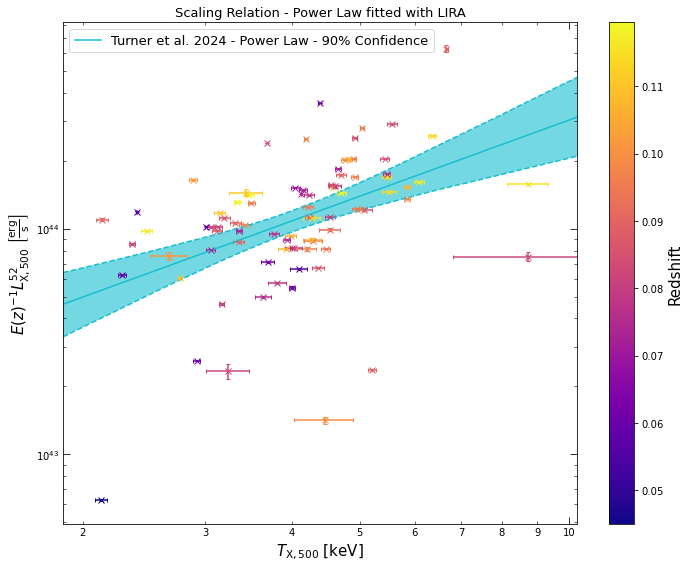

In [43]:
# lx52_tx_r500_metfix.view(y_lims=Quantity([1e+43, 1e+45], 'erg/s'))
lx52_tx_r500_metfix.view()

#### Free Abundance

In [40]:
lx = Quantity(res500_metfree[['Lx500_0.5-2.0', 'Lx500_0.5-2.0-', 'Lx500_0.5-2.0+']].values, 
              'erg/s')*inv_e[..., None]

# TODO WE'LL NEED TO DECIDE HOW TO DO THIS PROPERLY
lx[np.where((lx[:, 1] > lx[:, 0]) | (lx[:, 2] > lx[:, 0]))[0], :] = np.NaN

tx = Quantity(res500_metfree[['Tx500', 'Tx500-', 'Tx500+']].values, 'keV')

lx52_tx_r500_metfree = scaling_relation_lira(lx[:, 0], lx[:, 1:], tx[:, 0], tx[:, 1:], lx52_norm, tx_norm, 
                                             y_name=r'$E(z)^{-1}L^{52}_{\rm{X,500}}$', x_name=r'$T_{\rm{X,500}}$', 
                                             dim_hubb_ind=-1, point_names=names, third_dim_info=zs, 
                                             third_dim_name='Redshift', y_en_bounds=Quantity([0.5, 2.0], 'keV'))
lx52_tx_r500_metfree.author = "Turner et al."
lx52_tx_r500_metfree.model_colour = "firebrick"
lx52_tx_r500_metfree.name = r"X-LoVoCCS $R_{500}$ Met-Free"

/Users/dt237/code/XGA/xga/relations/fit.py:83: UserWarning: 39 sources have NaN values and have been excluded
  warn("{} sources have NaN values and have been excluded".format(thrown_away))


  |**************************************************| 100%


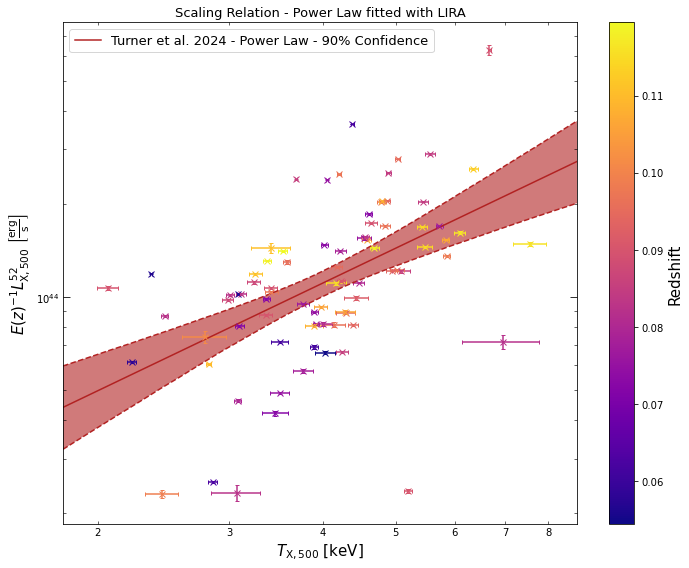

In [42]:
# lx52_tx_r500_metfree.view(y_lims=Quantity([1e+43, 1e+45], 'erg/s'))
lx52_tx_r500_metfree.view()

### $L^{52}_{\rm{X,500ce}}$-$T_{\rm{X,500ce}}$

#### Fixed Abundance

In [45]:
lx = Quantity(res500[['Lx500ce_0.5-2.0', 'Lx500ce_0.5-2.0-', 'Lx500ce_0.5-2.0+']].values, 'erg/s')*inv_e[..., None]
tx = Quantity(res500[['Tx500ce', 'Tx500ce-', 'Tx500ce+']].values, 'keV')

# TODO WE'LL NEED TO DECIDE HOW TO DO THIS PROPERLY
lx[np.where((lx[:, 1] > lx[:, 0]) | (lx[:, 2] > lx[:, 0]))[0], :] = np.NaN

lx52_tx_r500ce_metfix = scaling_relation_lira(lx[:, 0], lx[:, 1:], tx[:, 0], tx[:, 1:], lx52_norm, tx_norm, 
                                              y_name=r'$E(z)^{-1}L^{52}_{\rm{X,500ce}}$', 
                                              x_name=r'$T_{\rm{X,500ce}}$', 
                                              dim_hubb_ind=-1, point_names=names, third_dim_info=zs, 
                                              third_dim_name='Redshift', y_en_bounds=Quantity([0.5, 2.0], 'keV'))
lx52_tx_r500ce_metfix.author = "Turner et al."
lx52_tx_r500ce_metfix.model_colour = "seagreen"
lx52_tx_r500ce_metfix.name = r"X-LoVoCCS $R_{500ce}$ Met-Fixed"

/Users/dt237/code/XGA/xga/relations/fit.py:83: UserWarning: 36 sources have NaN values and have been excluded
  warn("{} sources have NaN values and have been excluded".format(thrown_away))


  |**************************************************| 100%


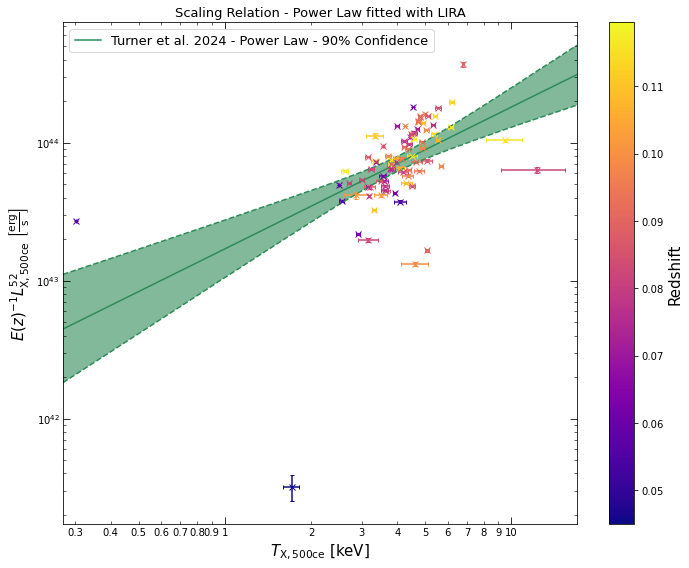

In [46]:
# lx52_tx_r500ce_metfix.view(x_lims=Quantity([1, 12], 'keV'), y_lims=Quantity([1e+43, 1e+45], 'erg/s'))
lx52_tx_r500ce_metfix.view()

#### Free Abundance

In [47]:
lx = Quantity(res500_metfree[['Lx500ce_0.5-2.0', 'Lx500ce_0.5-2.0-', 'Lx500ce_0.5-2.0+']].values, 
              'erg/s')*inv_e[..., None]
tx = Quantity(res500_metfree[['Tx500ce', 'Tx500ce-', 'Tx500ce+']].values, 'keV')

# TODO WE'LL NEED TO DECIDE HOW TO DO THIS PROPERLY
lx[np.where((lx[:, 1] > lx[:, 0]) | (lx[:, 2] > lx[:, 0]))[0], :] = np.NaN

lx52_tx_r500ce_metfree = scaling_relation_lira(lx[:, 0], lx[:, 1:], tx[:, 0], tx[:, 1:], lx52_norm, tx_norm, 
                                               y_name=r'$E(z)^{-1}L^{52}_{\rm{X,500ce}}$', x_name=r'$T_{\rm{X,500ce}}$', 
                                               dim_hubb_ind=-1, point_names=names, third_dim_info=zs, 
                                               third_dim_name='Redshift', y_en_bounds=Quantity([0.5, 2.0], 'keV'))
lx52_tx_r500ce_metfree.author = "Turner et al."
lx52_tx_r500ce_metfree.model_colour = "indigo"
lx52_tx_r500ce_metfree.name = r"X-LoVoCCS $R_{500ce}$ Met-Free"

/Users/dt237/code/XGA/xga/relations/fit.py:83: UserWarning: 37 sources have NaN values and have been excluded
  warn("{} sources have NaN values and have been excluded".format(thrown_away))


  |**************************************************| 100%


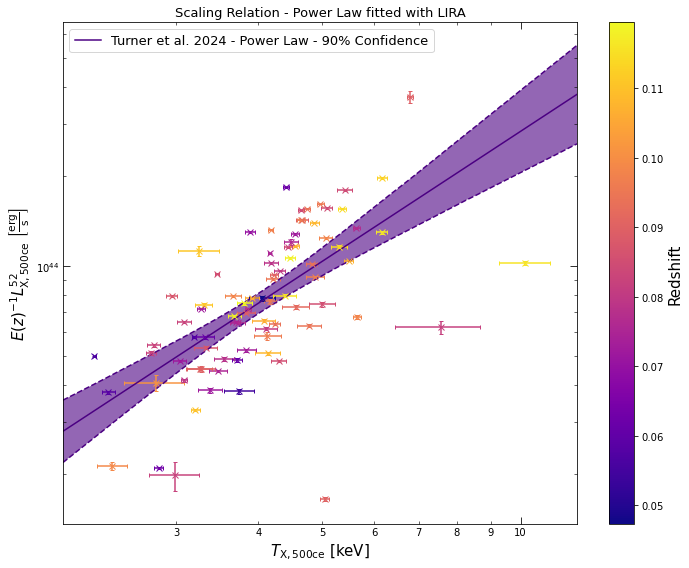

In [48]:
lx52_tx_r500ce_metfree.view()

### $L^{bol}_{\rm{X,500}}$-$T_{\rm{X,500}}$

#### Fixed Abundance

In [23]:
lx = Quantity(res500[['Lx500_0.01-100.0', 'Lx500_0.01-100.0-', 'Lx500_0.01-100.0+']].values, 
              'erg/s')*inv_e[..., None]
tx = Quantity(res500[['Tx500', 'Tx500-', 'Tx500+']].values, 'keV')

lxbol_tx_r500_metfix = scaling_relation_lira(lx[:, 0], lx[:, 1:], tx[:, 0], tx[:, 1:], lxbol_norm, tx_norm, 
                                            y_name=r'$E(z)^{-1}L^{bol}_{\rm{X,500}}$', x_name=r'$T_{\rm{X,500}}$', 
                                            dim_hubb_ind=-1, point_names=names, third_dim_info=zs, 
                                            third_dim_name='Redshift', y_en_bounds=Quantity([0.01, 100.0], 'keV'))
lxbol_tx_r500_metfix.author = "Turner et al."
lxbol_tx_r500_metfix.model_colour = "tab:cyan"
lxbol_tx_r500_metfix.name = r"X-LoVoCCS $R_{500}$ Met-Fixed"

/Users/dt237/code/XGA/xga/relations/fit.py:83: UserWarning: 35 sources have NaN values and have been excluded
  warn("{} sources have NaN values and have been excluded".format(thrown_away))


  |**************************************************| 100%


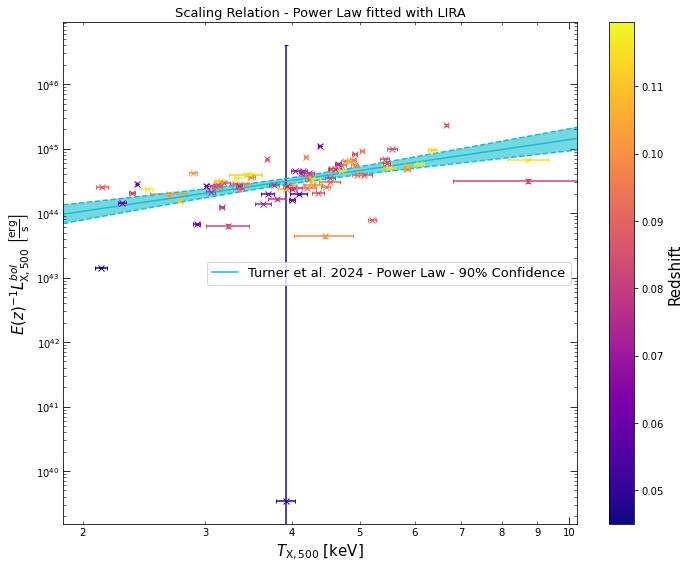

In [24]:
lxbol_tx_r500_metfix.view()

#### Free Abundance

In [27]:
lx = Quantity(res500_metfree[['Lx500_0.01-100.0', 'Lx500_0.01-100.0-', 'Lx500_0.01-100.0+']].values, 
              'erg/s')*inv_e[..., None]
tx = Quantity(res500_metfree[['Tx500', 'Tx500-', 'Tx500+']].values, 'keV')

lxbol_tx_r500_metfree = scaling_relation_lira(lx[:, 0], lx[:, 1:], tx[:, 0], tx[:, 1:], lxbol_norm, tx_norm, 
                                              y_name=r'$E(z)^{-1}L^{bol}_{\rm{X,500}}$', 
                                              x_name=r'$T_{\rm{X,500}}$', dim_hubb_ind=-1, point_names=names, 
                                              third_dim_info=zs, third_dim_name='Redshift', 
                                              y_en_bounds=Quantity([0.01, 100.0], 'keV'))
lxbol_tx_r500_metfree.author = "Turner et al."
lxbol_tx_r500_metfree.model_colour = "firebrick"
lxbol_tx_r500_metfree.name = r"X-LoVoCCS $R_{500}$ Met-Free"

/Users/dt237/code/XGA/xga/relations/fit.py:83: UserWarning: 37 sources have NaN values and have been excluded
  warn("{} sources have NaN values and have been excluded".format(thrown_away))


  |**************************************************| 100%


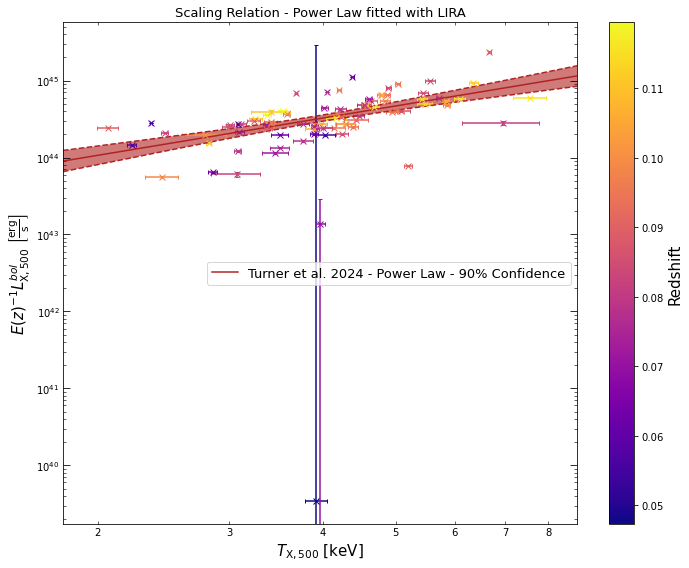

In [28]:
lxbol_tx_r500_metfree.view()

### $L^{bol}_{\rm{X,500ce}}$-$T_{\rm{X,500ce}}$

#### Fixed Abundance

In [29]:
lx = Quantity(res500[['Lx500ce_0.01-100.0', 'Lx500ce_0.01-100.0-', 'Lx500ce_0.01-100.0+']].values, 
              'erg/s')*inv_e[..., None]
tx = Quantity(res500[['Tx500ce', 'Tx500ce-', 'Tx500ce+']].values, 'keV')

lxbol_tx_r500ce_metfix = scaling_relation_lira(lx[:, 0], lx[:, 1:], tx[:, 0], tx[:, 1:], lxbol_norm, tx_norm, 
                                              y_name=r'$E(z)^{-1}L^{bol}_{\rm{X,500ce}}$', 
                                              x_name=r'$T_{\rm{X,500ce}}$', 
                                              dim_hubb_ind=-1, point_names=names, third_dim_info=zs, 
                                              third_dim_name='Redshift', 
                                               y_en_bounds=Quantity([0.01, 100.0], 'keV'))
lxbol_tx_r500ce_metfix.author = "Turner et al."
lxbol_tx_r500ce_metfix.model_colour = "seagreen"
lxbol_tx_r500ce_metfix.name = r"X-LoVoCCS $R_{500ce}$ Met-Fixed"

/Users/dt237/code/XGA/xga/relations/fit.py:83: UserWarning: 35 sources have NaN values and have been excluded
  warn("{} sources have NaN values and have been excluded".format(thrown_away))


  |**************************************************| 100%


#### Free Abundance

In [30]:
lx = Quantity(res500_metfree[['Lx500ce_0.01-100.0', 'Lx500ce_0.01-100.0-', 'Lx500ce_0.01-100.0+']].values, 
              'erg/s')*inv_e[..., None]
tx = Quantity(res500_metfree[['Tx500ce', 'Tx500ce-', 'Tx500ce+']].values, 'keV')

lxbol_tx_r500ce_metfree = scaling_relation_lira(lx[:, 0], lx[:, 1:], tx[:, 0], tx[:, 1:], lxbol_norm, tx_norm, 
                                                y_name=r'$E(z)^{-1}L^{bol}_{\rm{X,500ce}}$', 
                                                x_name=r'$T_{\rm{X,500ce}}$', 
                                                dim_hubb_ind=-1, point_names=names, third_dim_info=zs, 
                                                third_dim_name='Redshift', 
                                                y_en_bounds=Quantity([0.01, 100.0], 'keV'))
lxbol_tx_r500ce_metfree.author = "Turner et al."
lxbol_tx_r500ce_metfree.model_colour = "indigo"
lxbol_tx_r500ce_metfree.name = r"X-LoVoCCS $R_{500ce}$ Met-Free"

/Users/dt237/code/XGA/xga/relations/fit.py:83: UserWarning: 37 sources have NaN values and have been excluded
  warn("{} sources have NaN values and have been excluded".format(thrown_away))


  |**************************************************| 100%


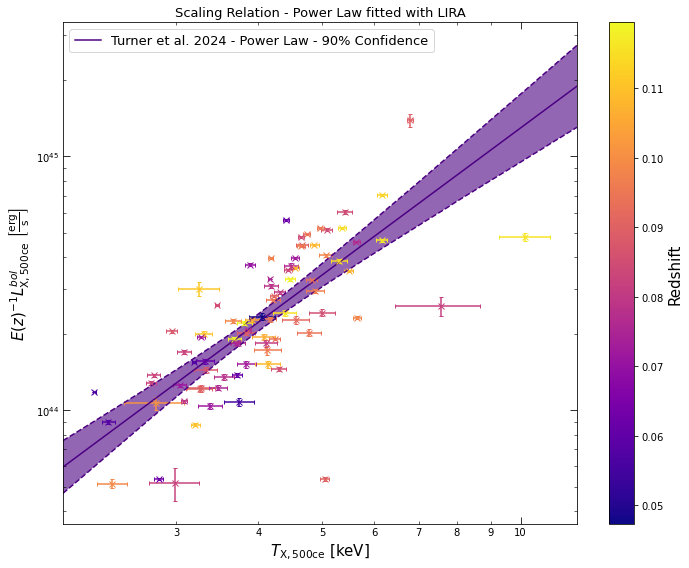

In [31]:
lxbol_tx_r500ce_metfree.view()

## Comparisons

### $L^{52}_{\rm{X}}$-$T_{\rm{X}}$

In [51]:
combo52 = (lx52_tx_r500_metfix + lx52_tx_r500_metfree + lx52_tx_r500ce_metfix + lx52_tx_r500ce_metfree)

/Users/dt237/code/XGA/xga/products/relation.py:1182: UserWarning: Not all of these ScalingRelations have the same x-axis names.
  warn('Not all of these ScalingRelations have the same x-axis names.')
/Users/dt237/code/XGA/xga/products/relation.py:1189: UserWarning: Not all of these ScalingRelations have the same y-axis names.
  warn('Not all of these ScalingRelations have the same y-axis names.')


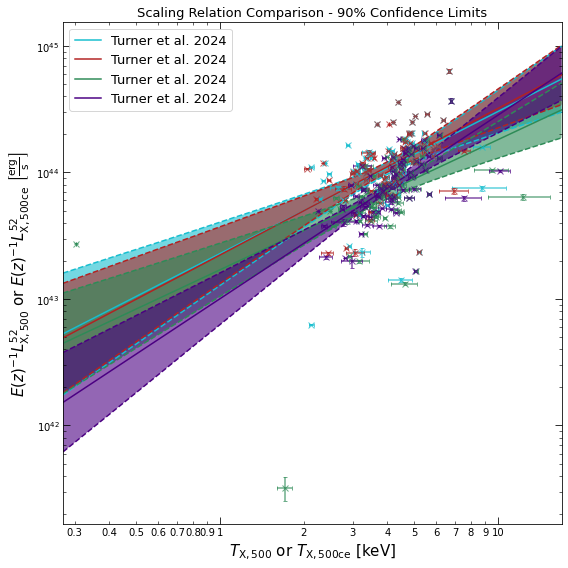

In [52]:
combo52.view()

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


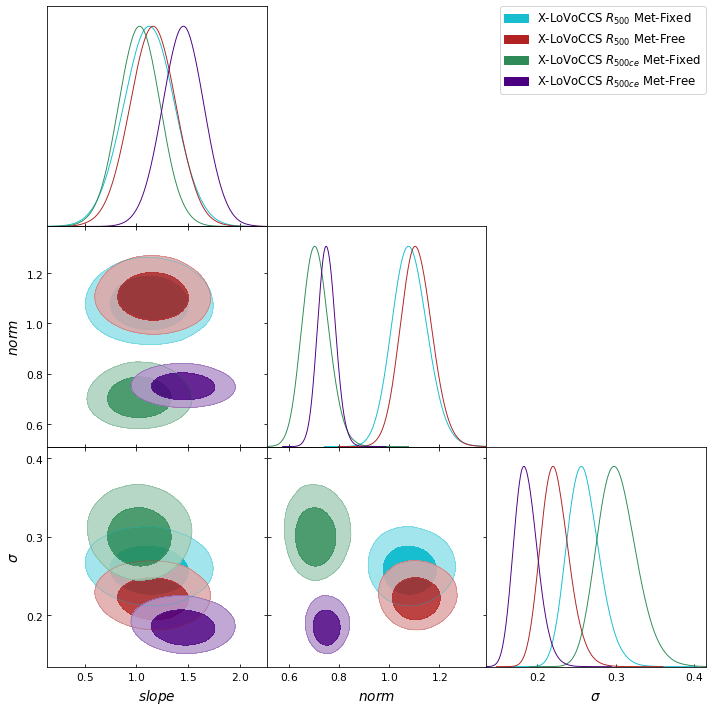

In [53]:
combo52.view_corner()

### $L^{bol}_{\rm{X}}$-$T_{\rm{X}}$

In [32]:
combobol = (lxbol_tx_r500_metfix + lxbol_tx_r500_metfree + lxbol_tx_r500ce_metfix + lxbol_tx_r500ce_metfree)

/Users/dt237/code/XGA/xga/products/relation.py:1182: UserWarning: Not all of these ScalingRelations have the same x-axis names.
  warn('Not all of these ScalingRelations have the same x-axis names.')
/Users/dt237/code/XGA/xga/products/relation.py:1189: UserWarning: Not all of these ScalingRelations have the same y-axis names.
  warn('Not all of these ScalingRelations have the same y-axis names.')


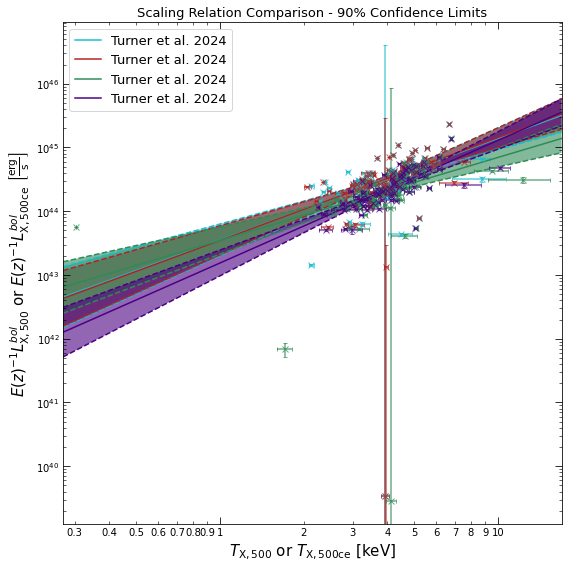

In [34]:
combobol.view()

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


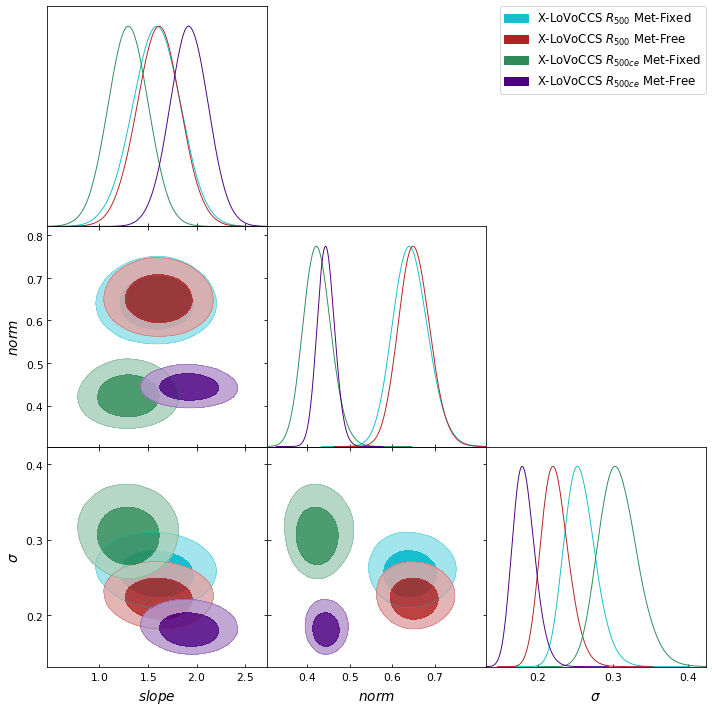

In [33]:
combobol.view_corner()